## Langchain

In [35]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ['GOOGLE_API_KEY'] = os.getenv('GOOGLE_API_KEY')
os.environ['COHERE_API_KEY'] = os.getenv('COHERE_API_KEY')
os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY')
os.environ['SERPAPI_API_KEY'] = os.getenv('SERPAPI_API_KEY')
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY')


In [57]:
from langchain.messages import HumanMessage

In [ ]:
from langchain.chat_models import init_chat_model


### Model Integration - using init_chat

In [97]:
### Open ai
llm_openai = init_chat_model("gpt-4.1")
llm_openai

### Google Gemini
llm_gemini = init_chat_model("google_genai:gemini-2.5-flash-lite")
llm_gemini

### Cohere
llm_cohere = init_chat_model("cohere:command")
llm_cohere

### Groq
llm_groq = init_chat_model("groq:qwen/qwen3-32b")
llm_groq


ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 16384, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x000001647C490490>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001647C492AA0>, model_name='qwen/qwen3-32b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [98]:
response = llm_groq.invoke("Hello, when was last finacial crash?")
response

AIMessage(content='<think>\nOkay, the user is asking when the last financial crash was. Let me start by recalling the major financial crises in recent history. The most notable ones are the 2008 Global Financial Crisis, the 1997 Asian Financial Crisis, the 2000 dot-com bubble burst, and the 2020 market crash due to the pandemic.\n\nThe user probably wants the most recent one. The 2020 crash comes to mind because it was caused by the COVID-19 pandemic, which is recent. But I should check if there have been any other significant crashes since then. For example, the 2022-2023 market turmoil due to the Ukraine war, inflation, and interest rate hikes. However, these might not be considered full-blown "crashes" but more like corrections or volatility.\n\nI need to define what constitutes a "financial crash." Typically, a crash is a sudden and sharp decline in asset prices, often exceeding 10% in a short period. The 2020 crash saw the S&P 500 drop by about 34% from peak to trough in March 202

## Groq
https://docs.langchain.com/oss/python/integrations/chat/groq

In [ ]:
from langchain_groq import ChatGroq

In [58]:
llm_groq = ChatGroq(
    model="qwen/qwen3-32b",
    temperature=0,
    max_tokens=None,
    reasoning_format="parsed",
    timeout=None,
    max_retries=2)

In [99]:
messages = [HumanMessage(content="1"), HumanMessage(content="2 3")]
ai_msg = llm_groq.invoke(messages)
ai_msg

AIMessage(content='<think>\nOkay, let me try to figure out what the user is asking for here. They started with "1" and then in the next message, they wrote "2 3". Hmm, maybe they\'re trying to create a sequence or list numbers? Or perhaps they want me to continue counting? Let me check the history.\n\nLooking back, the first message was just "1", and the assistant responded with a blank. Then the user followed up with "2 3". Maybe they\'re incrementally adding numbers and want the assistant to respond with the next in the sequence? So after 1, they said 2 3, maybe expecting 4 or something else? But the assistant\'s response is empty. Wait, maybe there was a technical issue where the assistant\'s response wasn\'t recorded? Let me see the structure again.\n\nThe user\'s first input: 1  \nAssistant response: [empty]  \nUser\'s second input: 2 3  \nAssistant response: [empty]  \n\nThis is confusing. Maybe the user is testing if the assistant can recognize patterns in their numbers. If they

## Cohere:
https://docs.langchain.com/oss/python/integrations/chat/cohere

In [ ]:
from langchain_cohere import ChatCohere

In [49]:
chat = ChatCohere(model="command")

In [50]:
messages = [HumanMessage(content="1"), HumanMessage(content="2 3")]
messages

[HumanMessage(content='1', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='2 3', additional_kwargs={}, response_metadata={})]

In [60]:
#chat.invoke(messages)

## Create a simple agent

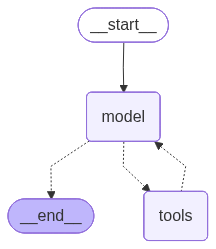

In [100]:
from langchain.agents import create_agent

def get_weather(city:str)-> str:
    """Get the weather for a city."""
    return f"The weather in {city} is cold and wet."

agent=create_agent(
    model=llm_groq,
    tools=[get_weather],
    system_prompt="You are a helpful assistant."
)
agent

In [101]:
print(get_weather.__doc__)


Get the weather for a city.


In [102]:
### run the agent
response=agent.invoke({"messages":[{"role":"user","content":"What is the weather like in London?"}]})

In [103]:
response["messages"]

[HumanMessage(content='What is the weather like in London?', additional_kwargs={}, response_metadata={}, id='95beea6c-9f16-45f3-9833-0eafb6deaefa'),
 AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking about the weather in London. I need to use the get_weather function. Let me check the function parameters. It requires a city, which is provided as London. So I\'ll call the function with city set to London. Make sure the JSON is correctly formatted with the city name in quotes. No other parameters are needed. Just pass "London" as the city value.\n', 'tool_calls': [{'id': 'b36aas66b', 'function': {'arguments': '{"city":"London"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 105, 'prompt_tokens': 160, 'total_tokens': 265, 'completion_time': 0.180452297, 'completion_tokens_details': {'reasoning_tokens': 81}, 'prompt_time': 0.006637158, 'prompt_tokens_details': None, 'queue_time': 0.198260481, 't

In [142]:
response["messages"][-1].content

"<think>\nAlright, the user is asking for 4 multiplied by 4. Let me start by recalling the previous interactions. They've been working through basic arithmetic problems like 2+2, 10*5, and 15-7, each time with detailed explanations. The assistant provided multiple methods for each answer, such as number lines, arrays, real-life examples, and sometimes even references to literature like Orwell's 1984.\n\nNow, the user's latest question is 4*4. Since they've already tackled similar problems, I need to present the answer in a way that's consistent with the previous responses. The user probably expects a thorough explanation with various methods to reinforce their understanding. They might be a student learning multiplication or someone refreshing their math skills, so clarity and multiple approaches are key.\n\nI should start with the straightforward answer, then break it down using different methods. The repeated addition method is a good start. Then an array model would visually represe

### Streaming and Barch

Streaming: Most models can stream their output content while it is being generated. By displaying output progressively, streaming significantly improves user experience, particularly for longer responses. Calling stream() returns an iterator that yields output chunks as they are produced. You can use a loop to process each chunk in real-time.


Batch: Batching a collection of independent requests to a model can significantly improve performance and reduce costs, as the processing can be done in parallel

In [ ]:
llm_groq.invoke("Write me a 200 words passage on Artificial Intelligence")

AIMessage(content='<think>\nOkay, I need to write a 200-word paragraph on Artificial Intelligence. Let me start by defining AI. Artificial Intelligence, or AI, refers to systems designed to perform tasks that typically require human intelligence. These tasks include learning, problem-solving, perception, and decision-making. I should mention the different types of AI, like narrow AI and general AI. Narrow AI is what we use today, like virtual assistants and recommendation systems. General AI is still theoretical. Then, I should talk about applications. AI is used in healthcare for diagnostics, in finance for fraud detection, and in autonomous vehicles. Machine learning and deep learning are subsets of AI. Maybe explain how they work, like neural networks. Also, ethical concerns are important—bias in AI, job displacement, privacy issues. Need to balance the benefits with the challenges. Highlight the transformative impact but also the need for responsible development. Let me check the w

In [ ]:
for chunk in llm_groq.stream("Why do parrots have colorful feathers?"):
    print(chunk.text, end="|", flush=True)


<think>


Okay
,
 so
 I
 need
 to
 figure
 out
 why
 par
rots
 have
 colorful
 feathers
.
 Let
 me
 start
 by
 recalling
 what
 I
 know
 about
 par
rots
.
 They
're
 known
 for
 being
 brightly
 colored
—
greens
,
 blues
,
 yell
ows
,
 red
s
,
 etc
.
 I
 remember
 hearing
 that
 color
ation
 in
 birds
 can
 serve
 various
 purposes
 like
 attracting
 mates
,
 camouflage
,
 or
 communication
.
 But
 why
 do
 par
rots
 specifically
 have
 such
 vibrant
 colors
?


First
,
 maybe
 it
's
 about
 attracting
 mates
.
 Like
 in
 many
 animals
,
 colorful
 displays
 can
 signal
 health
 and
 genetic
 fitness
.
 If
 a
 par
rot
 has
 bright
 feathers
,
 maybe
 it
's
 showing
 that
 it
's
 healthy
 and
 has
 good
 genes
.
 That
 makes
 sense
 because
 producing
 such
 vivid
 colors
 might
 require
 a
 lot
 of
 resources
 or
 good
 nutrition
.
 So
,
 a
 bird
 that
 can
 afford
 to
 produce
 these
 colors
 is
 probably
 in
 good
 condition
.


Another
 thought
 is
 that
 color
 plays
 a
 role
 in


In [106]:
llm_groq.batch(
    ["Why do parrots have colorful feathers?",
    "How do airplanes fly?",
    "What is quantum computing?"],
    config={
        'max_concurrency': 5,  # Limit to 5 parallel calls
    }
)

[AIMessage(content="<think>\nOkay, so I need to figure out why parrots have colorful feathers. Let me start by thinking about what I know about parrots. They’re known for their bright colors—green, red, blue, yellow, etc. I remember from biology that colors in animals can serve different purposes like camouflage, attracting mates, or warning predators. Maybe parrots use their colors for some of these reasons.\n\nFirst, maybe it's for attracting mates. I know that in many bird species, males have more vibrant colors to show they're healthy and a good genetic choice. If a parrot has bright feathers, maybe it's a sign that it has good genes. But wait, some parrots are both males and females with similar colors, so maybe it's not just for mating. Or maybe all parrots use color for mating displays regardless of gender.\n\nAnother thought: camouflage. Some parrots live in environments with lots of green foliage, like rainforests. If their feathers are green, they might blend in with the tree

### Tools

Models can request to call tools that perform tasks such as fetching data from a database, searching the web, or running code. Tools are pairings of:

- A schema, including the name of the tool, a description, and/or argument definitions (often a JSON schema)
- A function or coroutine to execute.

In [ ]:
from langchain.tools import tool

@tool
def get_weather(location:str)->str:
    """Get the weather at a location"""
    return f"It's cold and rainy in {location}"


print(get_weather.__doc__)
print(get_weather.description)

Tool that can operate on any number of inputs.
Get the weather at a location


In [116]:
### bind tools to llm
model_with_tools=llm_groq.bind_tools([get_weather])

In [117]:
response = model_with_tools.invoke("What's the weather like in London?")
print(response)

content='' additional_kwargs={'reasoning_content': "Okay, the user is asking about the weather in London. I need to use the get_weather function. Let me check the function parameters. It requires a location, which is provided as London. So I'll call the function with location set to London. Make sure the JSON is correctly formatted with the name and arguments.\n", 'tool_calls': [{'id': 'rgkd99ptp', 'function': {'arguments': '{"location":"London"}', 'name': 'get_weather'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 154, 'total_tokens': 242, 'completion_time': 0.138763133, 'completion_tokens_details': {'reasoning_tokens': 64}, 'prompt_time': 0.00656461, 'prompt_tokens_details': None, 'queue_time': 0.088233047, 'total_time': 0.145327743}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'} id='lc_run--019b83d0-05

In [119]:
for tool_call in response.tool_calls:
    print(f"Tool: {tool_call['name']}")
    print(f"Args: {tool_call['args']}")

Tool: get_weather
Args: {'location': 'London'}


#### Messages

Messages are the fundamental unit of context for models in LangChain. They represent the input and output of models, carrying both the content and metadata needed to represent the state of a conversation when interacting with an LLM. Messages are objects that contain:

* Role - Identifies the message type (e.g. system, user)
* Content - Represents the actual content of the message (like text, images, audio, documents, etc.)
* Metadata - Optional fields such as response information, message IDs, and token usage

LangChain provides a standard message type that works across all model providers, ensuring consistent behavior regardless of the model being called.

In [120]:
from langchain.messages import AIMessage, SystemMessage, HumanMessage

# Create an AI message manually (e.g., for conversation history)
ai_msg = AIMessage("I'd be happy to help you with that question!")

# Add to conversation history
messages = [
    SystemMessage("You are a helpful assistant"),
    HumanMessage("Can you help me?"),
    ai_msg,  # Insert as if it came from the model
    HumanMessage("Great! What's 2+2?")
]

response = llm_groq.invoke(messages)
print(response.content)

<think>
Okay, the user asked, "Great! What's 2+2?" I need to respond appropriately. Let me start by recalling that 2+2 is a basic arithmetic problem. The answer is 4, but I should make sure there's no trick or context I'm missing.

First, I'll confirm the straightforward answer. 2 plus 2 equals 4. But maybe the user is testing if I know that, or perhaps there's a deeper reason for the question. Sometimes people ask this to check if the AI is functioning correctly, or maybe they want to see if I can handle simple math. 

Looking at the history, the user started with "Can you help me?" and I said I'd help. Then they asked about 2+2. Since it's a simple question, I should answer directly but also be friendly. The user might be looking for a quick confirmation or just making conversation. 

I should also consider if there's a cultural or psychological angle. 2+2=4 is often referenced in various contexts, like literature or movies. For example, in George Orwell's "1984," the government forc

In [121]:
response.usage_metadata

{'input_tokens': 53, 'output_tokens': 468, 'total_tokens': 521}

### Structured output
Models can be requested to provide their response in a format matching a given schema. This is useful for ensuring the output can be easily parsed and used in subsequent processing. LangChain supports multiple schema types and methods for enforcing structured output.

Pydantic: Pydantic models provide the richest feature set with field validation, descriptions, and nested structures.

In [122]:
from pydantic import BaseModel,Field

class Movie(BaseModel):
    title:str=Field(description="The title of the movie")
    year:int=Field(description="This year the movie was released")
    director:str=Field(description="The director of the movie")
    rating:float=Field(description="The movies rating out of 10")

In [126]:
model_with_structure=llm_groq.with_structured_output(Movie, include_raw=True)
model_with_structure

{
  raw: RunnableBinding(bound=ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 16384, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x000001647C490490>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001647C492AA0>, model_name='qwen/qwen3-32b', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'Movie', 'description': '', 'parameters': {'properties': {'title': {'description': 'The title of the movie', 'type': 'string'}, 'year': {'description': 'This year the movie was released', 'type': 'integer'}, 'director': {'description': 'The director of the movie', 'type': 'string'}, 'rating': {'description': 'The movies rating out of 10', 'type': 'number'}}, 'required': ['title', 

In [127]:
response=model_with_structure.invoke("Provide details about the moview Inception")
response

{'raw': AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for details about the movie Inception. Let me check what tools I have available. There\'s a Movie function that requires title, year, director, and rating. I need to make sure I have all that information for Inception. \n\nFirst, the title is obviously "Inception". The year it was released was 2010. The director is Christopher Nolan. As for the rating, I think it\'s around 8.8 on IMDb. Let me confirm that. Yep, IMDb gives it 8.8/10. So I have all the required parameters. I should structure the tool call with these details. Just need to format it correctly in JSON inside the tool_call tags.\n', 'tool_calls': [{'id': '0nag6m78z', 'function': {'arguments': '{"director":"Christopher Nolan","rating":8.8,"title":"Inception","year":2010}', 'name': 'Movie'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 197, 'prompt_tokens': 226, 'total_tokens': 423, 'completion_time

In [128]:
from typing_extensions import TypedDict,Annotated

class Actor(TypedDict):
    name: str
    role: str

class MovieDetails(TypedDict):
    title: str
    year: int
    cast: list[Actor]
    genres: list[str]
    budget: float | None = Field(None, description="Budget in millions USD")

model_with_structure = llm_groq.with_structured_output(MovieDetails)

response = model_with_structure.invoke("Provide details about the movie Avengers")
response

{'budget': 220000000,
 'cast': [{'name': 'Robert Downey Jr.', 'role': 'Iron Man'},
  {'name': 'Chris Evans', 'role': 'Captain America'},
  {'name': 'Mark Ruffalo', 'role': 'Hulk'},
  {'name': 'Chris Hemsworth', 'role': 'Thor'},
  {'name': 'Scarlett Johansson', 'role': 'Black Widow'},
  {'name': 'Jeremy Renner', 'role': 'Hawkeye'}],
 'genres': ['Action', 'Adventure', 'Science Fiction'],
 'title': 'Avengers',
 'year': 2012}

### Middleware
Middleware provides a way to more tightly control what happens inside the agent. Middleware is useful for the following:

- Tracking agent behavior with logging, analytics, and debugging.
- Transforming prompts, tool selection, and output formatting.
- Adding retries, fallbacks, and early termination logic.
- Applying rate limits, guardrails, and PII detection


### Built-in Middleware:

https://docs.langchain.com/oss/python/langchain/middleware/built-in

**Summarization MiddleWare**: Automatically summarize conversation history when approaching token limits, preserving recent messages while compressing older context. Summarization is useful for the following:

- Long-running conversations that exceed context windows.
- Multi-turn dialogues with extensive history.
- Applications where preserving full conversation context matters.

**Human in the feedback**

**Model call limit**

In [133]:
from langchain.agents import create_agent
from langchain.agents.middleware import SummarizationMiddleware
from langgraph.checkpoint.memory import InMemorySaver
from langchain_core.messages import HumanMessage, SystemMessage

In [134]:
### Messagebased summarization
agent=create_agent(
    model=llm_groq,
    checkpointer=InMemorySaver(),
    middleware=[
        SummarizationMiddleware(
            model=llm_groq,
            trigger=("messages",10),
            keep=("messages",4)
        )
    ]
)

In [135]:
## To label and persist the agent's conversation state using a thread ID.
config={"configurable":{"thread_id":"test-1"}}

In [132]:
# Alternative test data
questions = [
    "What is 2+2?",
    "What is 10*5?",
    "What is 100/4?",
    "What is 15-7?",
    "What is 3*3?",
    "What is 4*4?",
]

for q in questions:
    response=agent.invoke({"messages":[HumanMessage(content=q)]},config)
    print(f"Messages: {response}")
    print(f"Messages: {len(response['messages'])}")

Messages: {'messages': [HumanMessage(content='What is 2+2?', additional_kwargs={}, response_metadata={}, id='15ac210f-ddb1-472b-b262-acd7f818763b'), AIMessage(content='<think>\nOkay, the user is asking "What is 2+2?" That seems straightforward, but maybe they want a detailed explanation. Let me start by recalling basic arithmetic. Addition is one of the fundamental operations in mathematics. When you add two numbers, you combine their quantities. So, 2 plus 2 should be 4.\n\nWait, but maybe they want to see the process. Let me break it down step by step. If you have two apples and someone gives you two more apples, how many apples do you have in total? You count them: 1, 2, then 3, 4. So that\'s four apples. That\'s a concrete example.\n\nAlternatively, using the number line. Start at 2 and move 2 units to the right. You land on 4. That\'s another way to visualize it. In terms of set theory, if you have a set with two elements and another set with two elements, the union (assuming no o

#### Human In the Loop MiddleWare
Pause agent execution for human approval, editing, or rejection of tool calls before they execute. Human-in-the-loop is useful for the following:

- High-stakes operations requiring human approval (e.g. database writes, financial transactions).
- Compliance workflows where human oversight is mandatory.
- Long-running conversations where human feedback guides the agent.

In [136]:
from langchain.agents import create_agent
from langchain.agents.middleware import HumanInTheLoopMiddleware
from langgraph.checkpoint.memory import InMemorySaver

def read_email_tool(email_id: str) -> str:
    """Mock function to read an email by its ID."""
    return f"Email content for ID: {email_id}"

def send_email_tool(recipient: str, subject: str, body: str) -> str:
    """Mock function to send an email."""
    return f"Email sent to {recipient} with subject '{subject}'"

In [137]:
agent=create_agent(
    model=llm_groq,
    tools=[read_email_tool,
           send_email_tool],
    checkpointer=InMemorySaver(),
    middleware=[
        HumanInTheLoopMiddleware(
            interrupt_on={
                "send_email_tool":{
                    "allowed_decisions":["approve","edit","reject"]
                },
                "read_email_tool":False,

            }
        )
    ]
)

In [138]:
config = {"configurable": {"thread_id": "test-approve"}}
# Step 1: Request
result = agent.invoke(
    {"messages": [HumanMessage(content="Send email to john@test.com with subject 'Hello' and body 'How are you?'")]},
    config=config
)

In [139]:
result

{'messages': [HumanMessage(content="Send email to john@test.com with subject 'Hello' and body 'How are you?'", additional_kwargs={}, response_metadata={}, id='4728518b-e0a6-48fd-8569-eb7ce05f4554'),
  AIMessage(content='', additional_kwargs={'reasoning_content': "Okay, the user wants to send an email to john@test.com with the subject 'Hello' and body 'How are you?'. Let me check the available tools. There's a send_email_tool that requires recipient, subject, and body. The parameters are all there, so I need to call that function with the provided details. No need to use the read_email_tool here since it's about sending, not reading. I'll structure the tool_call with the arguments as specified.\n", 'tool_calls': [{'id': '7tsnx6rp2', 'function': {'arguments': '{"body":"How are you?","recipient":"john@test.com","subject":"Hello"}', 'name': 'send_email_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 139, 'prompt_tokens': 251, 'total_tokens': 390, 'com

In [140]:
from langgraph.types import Command
# Step 2: Approve
if "__interrupt__" in result:
    print("⏸️ Paused! Approving...")
    
    result = agent.invoke(
        Command(
            resume={
                "decisions": [
                    {"type": "approve"}
                ]
            }
        ),
        config=config
    )
    
    print(f"✅ Result: {result['messages'][-1].content}")

⏸️ Paused! Approving...
✅ Result: The email has been successfully sent to john@test.com with the subject "Hello" and the message "How are you?".

Let me know if you'd like to perform another action!


In [141]:
result

{'messages': [HumanMessage(content="Send email to john@test.com with subject 'Hello' and body 'How are you?'", additional_kwargs={}, response_metadata={}, id='4728518b-e0a6-48fd-8569-eb7ce05f4554'),
  AIMessage(content='', additional_kwargs={'reasoning_content': "Okay, the user wants to send an email to john@test.com with the subject 'Hello' and body 'How are you?'. Let me check the available tools. There's a send_email_tool that requires recipient, subject, and body. The parameters are all there, so I need to call that function with the provided details. No need to use the read_email_tool here since it's about sending, not reading. I'll structure the tool_call with the arguments as specified.\n", 'tool_calls': [{'id': '7tsnx6rp2', 'function': {'arguments': '{"body":"How are you?","recipient":"john@test.com","subject":"Hello"}', 'name': 'send_email_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 139, 'prompt_tokens': 251, 'total_tokens': 390, 'com